In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [4]:
data.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [5]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


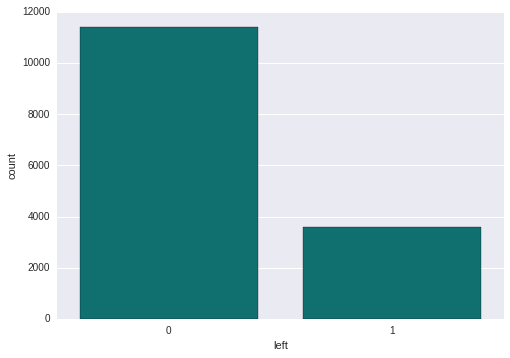

In [8]:
sns.countplot('left', data = data, color='teal')
plt.show()

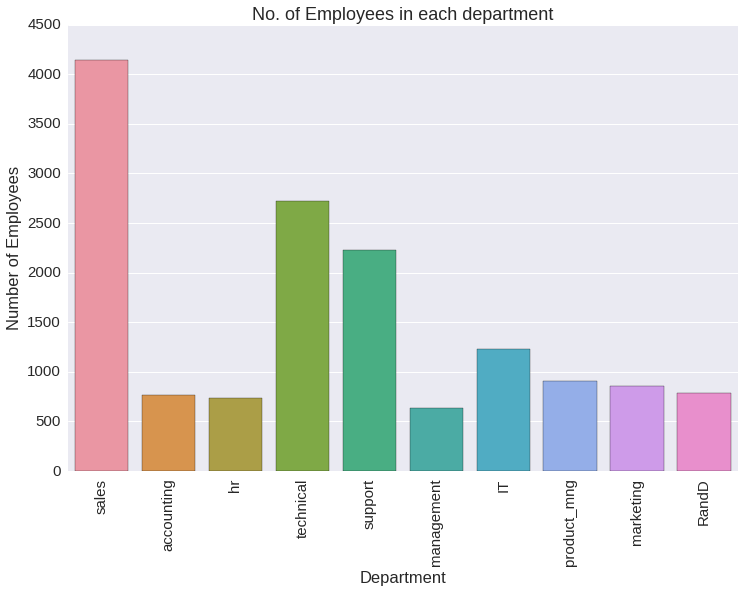

In [9]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.countplot(x = "sales", data = data)
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('No. of Employees in each department')
plt.xticks(rotation="vertical")
plt.show()

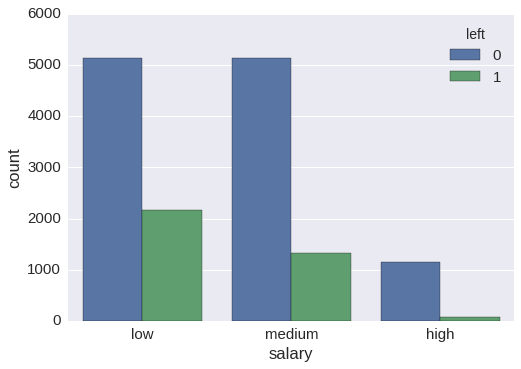

In [10]:
sns.countplot(x = 'salary',data=data,hue='left')
plt.show()

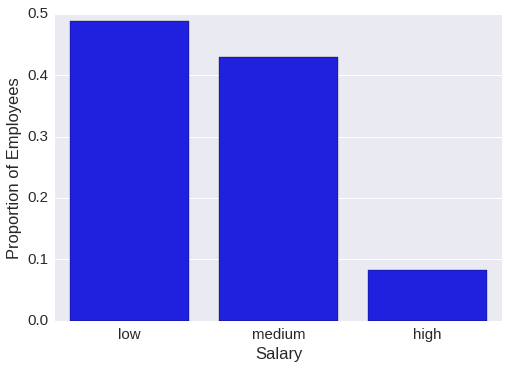

In [11]:
count = data.salary.value_counts(normalize=True)
sns.barplot(count.index,count.values, color = 'blue')
plt.ylabel('Proportion of Employees')
plt.xlabel('Salary')
plt.show()

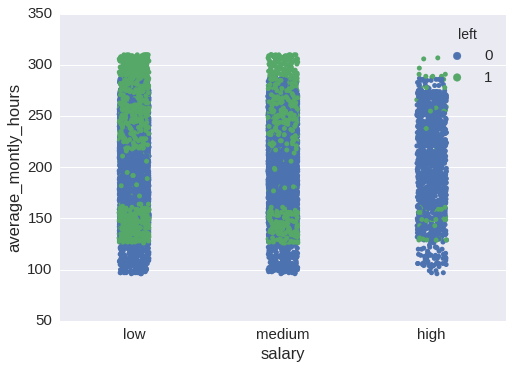

In [12]:
sns.stripplot(x = 'salary', y='average_montly_hours', data=data, jitter = True, hue= 'left')
plt.show()

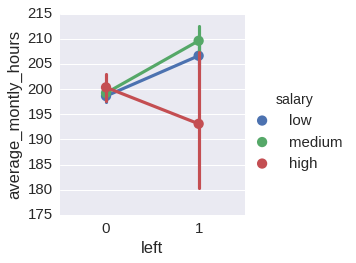

In [13]:
sns.factorplot(x = 'left', y='average_montly_hours',data=data, hue='salary')
plt.show()

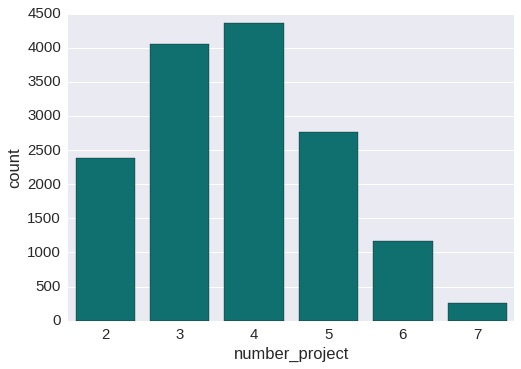

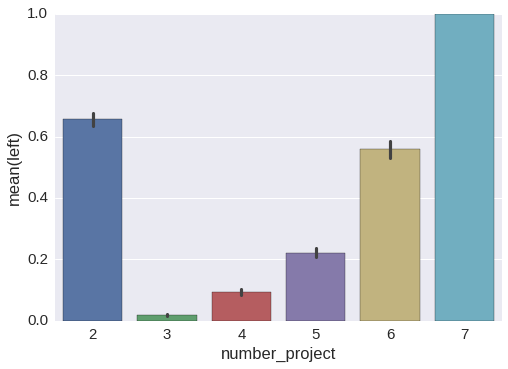

In [14]:
sns.countplot('number_project', data = data, color = 'teal')
plt.show()
sns.barplot(x = 'number_project', y='left', data=data)
plt.show()

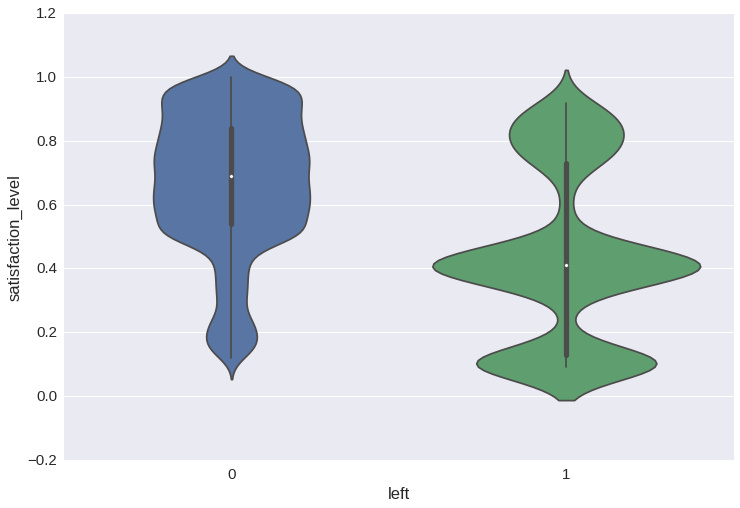

In [15]:
plt.figure(figsize=(12,8))
sns.violinplot(x = 'left', y = 'satisfaction_level', data=data)
plt.show()

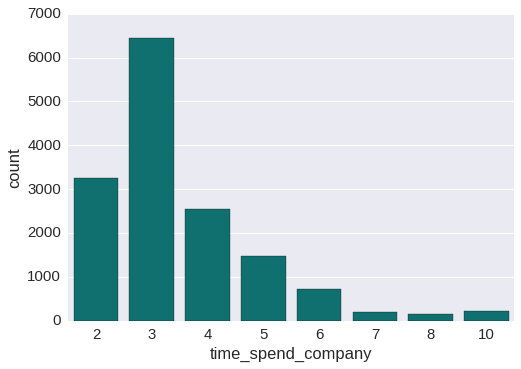

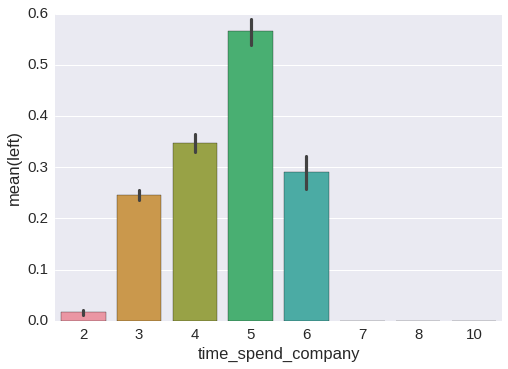

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64


In [16]:
sns.countplot('time_spend_company', data = data, color = 'teal')
plt.show()
sns.barplot(x='time_spend_company', y='left', data=data)
plt.show()
print(data.time_spend_company.value_counts())

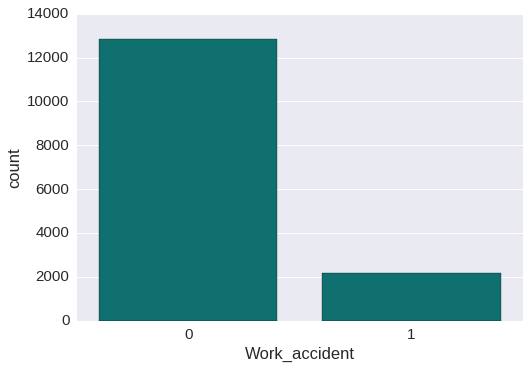

Work Accident
0    12830
1     2169
Name: Work_accident, dtype: int64


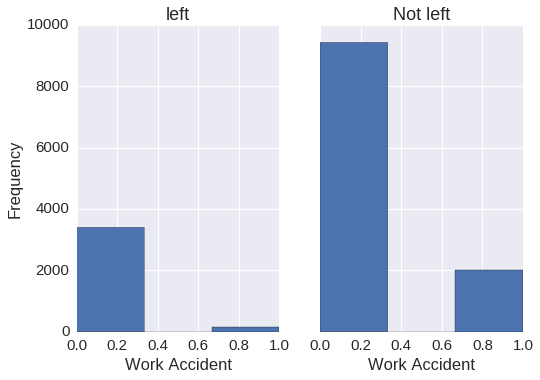

In [17]:
sns.countplot('Work_accident', data = data, color='teal')
plt.show()
left = data[data.left==1]
notleft = data[data.left==0]
f,a = plt.subplots(1,2,sharey=True)
a[0].hist(x='Work_accident', bins=3 ,data=left)
a[0].set_title('left')
a[0].set_xlabel('Work Accident')
a[0].set_ylabel('Frequency')
a[1].hist(x='Work_accident', bins=3, data=notleft)
a[1].set_title('Not left')
a[1].set_xlabel('Work Accident')

print('Work Accident')
print(data.Work_accident.value_counts())
plt.show()

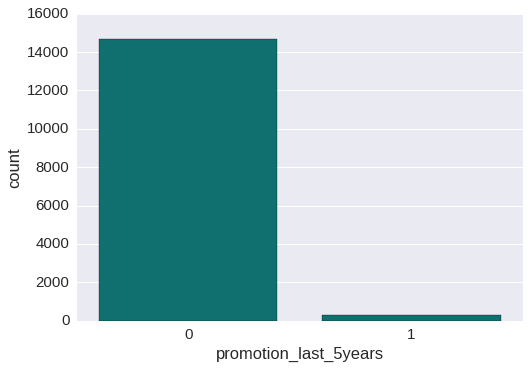

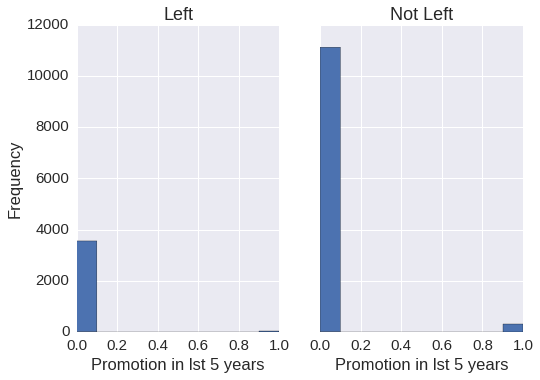

In [18]:
sns.countplot('promotion_last_5years', data=data, color='teal')
plt.show()
f,a = plt.subplots(1, 2, sharey= True)
a[0].hist(x='promotion_last_5years', data=left)
a[0].set_title('Left')
a[0].set_xlabel('Promotion in lst 5 years')
a[0].set_ylabel('Frequency')
a[1].hist(x='promotion_last_5years', data=notleft)
a[1].set_title('Not Left')
a[1].set_xlabel('Promotion in lst 5 years')
plt.show()

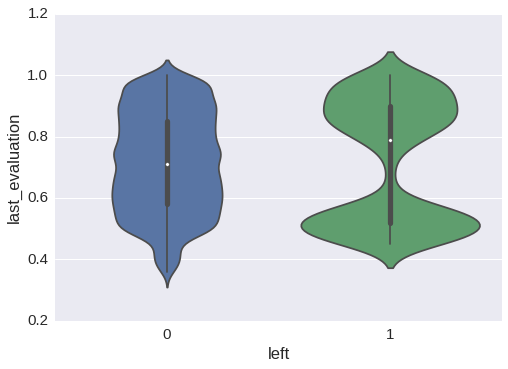

In [19]:
sns.violinplot(x='left', y='last_evaluation', data=data)
plt.show()

In [20]:
le = LabelEncoder()
data.sales = le.fit_transform(data.sales)
data.left = le.fit_transform(data.left)
data.salary = le.fit_transform(data.salary)
y = data.left

In [21]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                      int64
salary                     int64
dtype: object

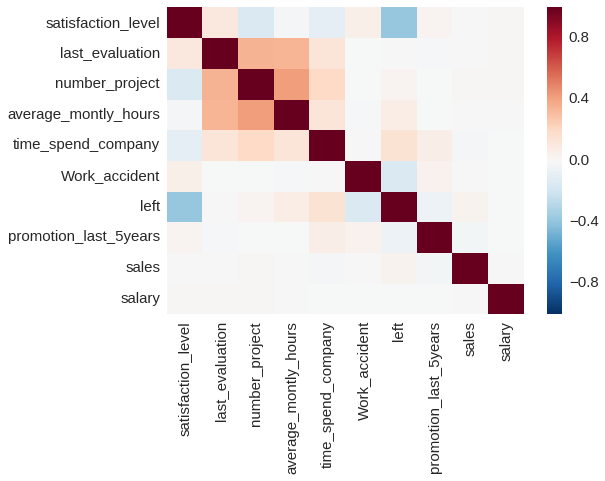

In [22]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

In [23]:
train_features = data.columns
sc = StandardScaler()
data_scaled = sc.fit_transform(data)

In [24]:
index = np.random.randint(0,data_scaled.shape[0],size=10000)

In [25]:
pca = PCA(n_components=2)
pca_representation = pca.fit_transform(data_scaled[index])

In [26]:
iso = Isomap(n_components=2, n_neighbors=40)
iso_representation = iso.fit_transform(data_scaled[index])

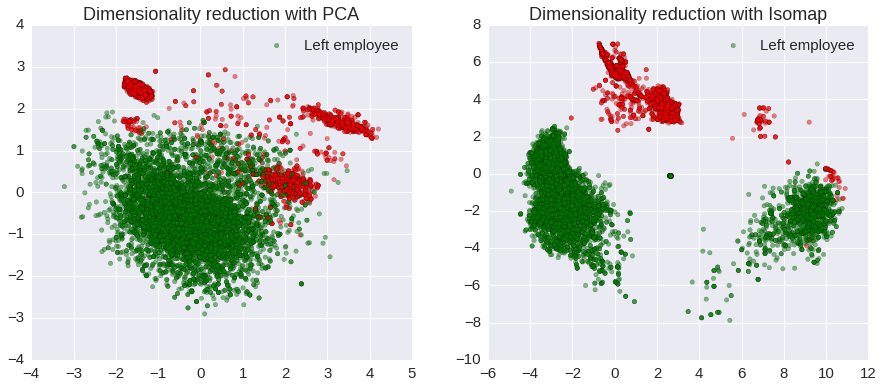

In [27]:
left_colors = data["left"].map(lambda s : "g" if s==0 else "r")

fig, axes = plt.subplots(1,2,figsize=(15,6))

axes[0].scatter(pca_representation[:,0],pca_representation[:,1],
            c = left_colors[index],alpha=0.5,s=20)
axes[0].set_title("Dimensionality reduction with PCA")
axes[0].legend(["Left employee"])

axes[1].scatter(iso_representation[:,0],iso_representation[:,1],
            c = left_colors[index],alpha=0.5,s=20)
axes[1].set_title("Dimensionality reduction with Isomap")
axes[1].legend(["Left employee"])
plt.show()

In [28]:
data = data.drop(['left'],axis=1)
from sklearn.cross_validation import cross_val_score
def estimating(estimator1,dat,label):
    accuracies = cross_val_score(estimator = estimator1, X = dat, y = label, cv = 5)
    print(accuracies)
    print(accuracies.mean())

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
estimating(classifier1,data,y)

[ 0.93668777  0.917       0.919       0.94364788  0.91863955]
0.926995039977


In [30]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'rbf')
estimating(classifier2,data,y)

[ 0.95068311  0.938       0.94433333  0.95365122  0.94398133]
0.946129796629


In [31]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
estimating(classifier3,data,y)

[ 0.76241253  0.78833333  0.77966667  0.77159053  0.78526175]
0.77745296265


In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier4 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier4.fit(data,y)
estimating(classifier4,data,y)

[ 0.99866711  0.981       0.98566667  0.99899967  0.99466489]
0.991799666496


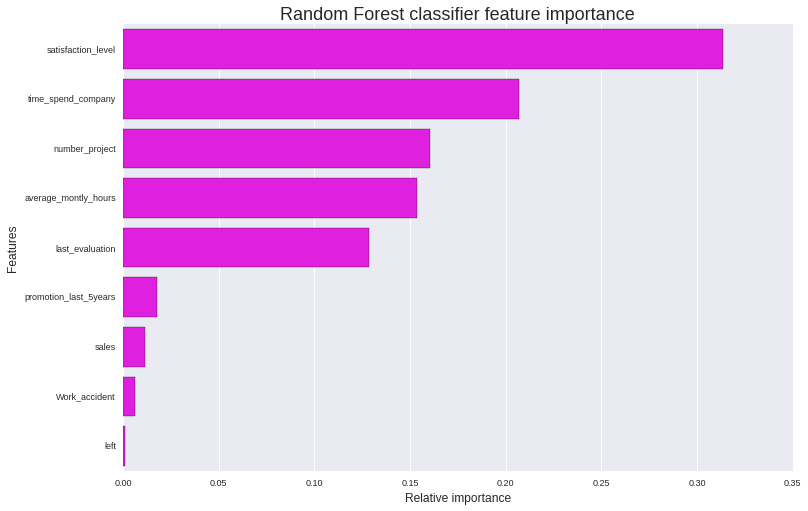

In [33]:
indices = np.argsort(classifier4.feature_importances_)[::-1][:40]
fig = plt.figure(figsize=(12,8))
g = sns.barplot(y=train_features[indices][:40],x = classifier4.feature_importances_[indices][:40] , orient='h', color='magenta')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("Random Forest classifier feature importance")

plt.show()
plt.gcf().clear()